In [6]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu, normaltest, wilcoxon
from statannot import add_stat_annotation

In [7]:
ecfp4 = pd.read_csv("./Data/compare/ecfp4.csv",index_col=0)
rdkdes = pd.read_csv("./Data/compare/rdkdes.csv",index_col=0)
maccs = pd.read_csv("./Data/compare/maccs.csv",index_col=0)
gnn = pd.read_csv("./Data/compare/record_gnn_270623.csv",index_col=0)

In [8]:
F1_internal =pd.DataFrame({"ecfp4":ecfp4["f1"].values,
                           "rdkdes":rdkdes["f1"].values,
                           "maccs":maccs["f1"].values,
                           "GNN":gnn["F1_record"].values,
                         })

AP_internal =pd.DataFrame({"ecfp4":ecfp4["ap"].values,
                           "rdkdes":rdkdes["ap"].values,
                           "maccs":maccs["ap"].values,
                           "GNN":gnn["AP_record"].values,
                         })

In [9]:
F1_internal.mean()

ecfp4     0.799866
rdkdes    0.748052
maccs     0.744632
GNN       0.804402
dtype: float64

maccs vs. GNN: Custom statistical test, P_val:2.091e-04
rdkdes vs. GNN: Custom statistical test, P_val:3.801e-04
ecfp4 vs. GNN: Custom statistical test, P_val:7.611e-01


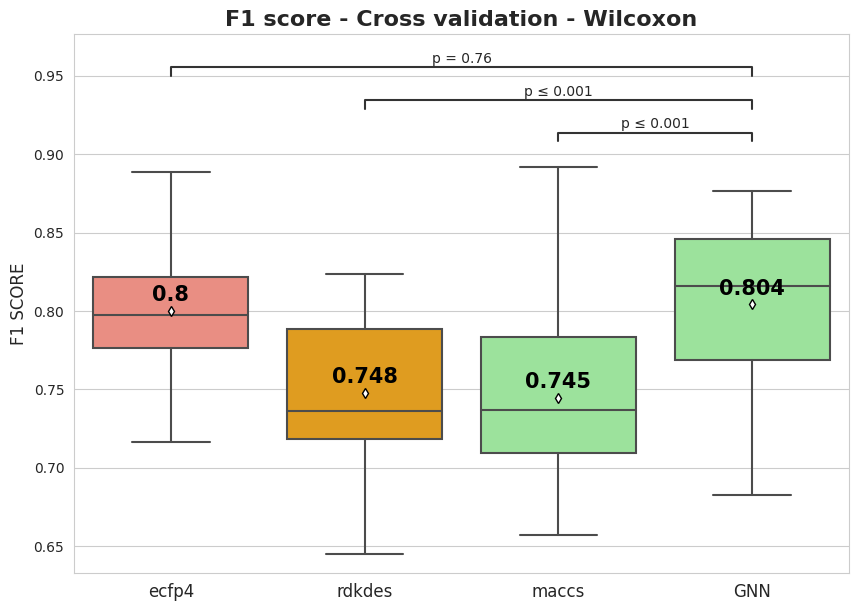

In [10]:
# F1 score

df_melt = pd.melt(F1_internal.reset_index(), id_vars=['index'], value_vars=F1_internal.columns)
df_melt.columns = ['index', 'Model', 'F1']
subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)

stat_results = [wilcoxon(F1_internal['ecfp4'].astype('float'), F1_internal['GNN'].astype('float'), alternative="two-sided"),
                wilcoxon(F1_internal['rdkdes'].astype('float'), F1_internal['GNN'].astype('float'), alternative="two-sided"),
                wilcoxon(F1_internal['maccs'].astype('float'), F1_internal['GNN'].astype('float'), alternative="two-sided"),]

pvalues = [result.pvalue for result in stat_results]
plotting_parameters = {
'data':    df_melt,
'x':       'Model',
'y':       'F1',
'palette': subcat_palette[1:]}

pairs = [('ecfp4', 'GNN'),
          ('rdkdes', 'GNN'),
         ('maccs', 'GNN'),]


sns.set_style("whitegrid")
plt.figure(figsize = (10,7))

my_colors = {'ecfp4': 'salmon', 
             'rdkdes': 'orange', 
             'maccs': 'lightgreen',
             # 'GS': 'lightblue',
             'GNN': 'lightgreen'}


ax = sns.boxplot(x='Model', y='F1', data=df_melt, palette=my_colors, showmeans=True ,meanprops={"marker":"d",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                          "markersize":"5"})

mean = round(F1_internal.mean(),3)
data = np.array(mean)   
ser = pd.Series(data, index =F1_internal.columns)

dict_columns = {'Mean':mean,}
df = pd.DataFrame(dict_columns)

vertical_offset = df["Mean"].median()*0.008

for xtick in ax.get_xticks():
    ax.text(xtick,ser[xtick]+ vertical_offset,ser[xtick], horizontalalignment='center',color='k',weight='semibold', fontsize = 15)


annotator = Annotator(ax, pairs, **plotting_parameters)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(pvalues)

ax.set_ylabel('F1 SCORE', fontsize = 12)
ax.set_xlabel(None)
ax.set_xticklabels(labels = F1_internal.columns, fontsize = 12)
ax.set_title("F1 score - Cross validation - Wilcoxon",fontsize = 16, weight ='semibold')
plt.savefig("./Data/compare/f1_compare.png", dpi = 600)
plt.show()

maccs vs. GNN: Custom statistical test, P_val:1.598e-05
rdkdes vs. GNN: Custom statistical test, P_val:7.979e-04
ecfp4 vs. GNN: Custom statistical test, P_val:9.354e-01


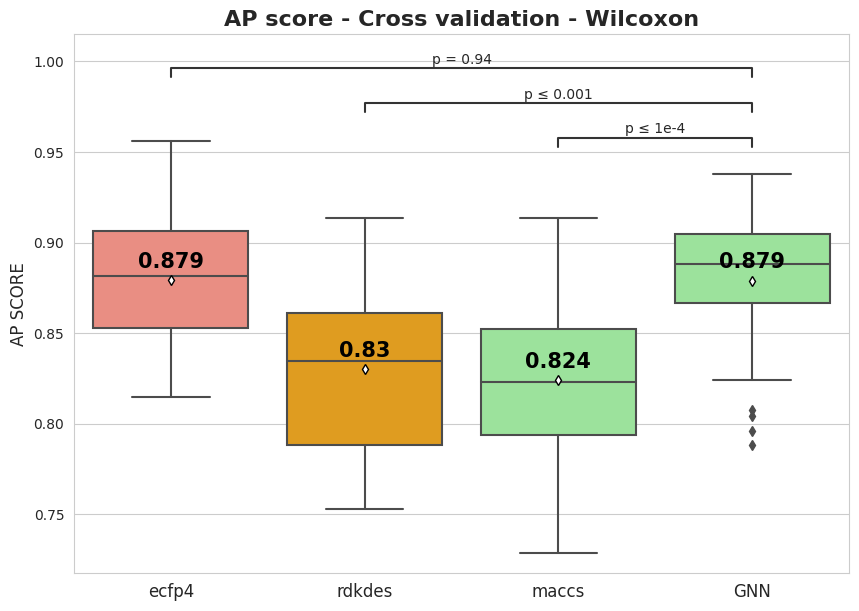

In [11]:
# AP score

df_melt = pd.melt(AP_internal.reset_index(), id_vars=['index'], value_vars=AP_internal.columns)
df_melt.columns = ['index', 'Model', 'AP']
subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)

stat_results = [wilcoxon(AP_internal['ecfp4'].astype('float'), AP_internal['GNN'].astype('float'), alternative="two-sided"),
                wilcoxon(AP_internal['rdkdes'].astype('float'), AP_internal['GNN'].astype('float'), alternative="two-sided"),
                wilcoxon(AP_internal['maccs'].astype('float'), AP_internal['GNN'].astype('float'), alternative="two-sided"),]

pvalues = [result.pvalue for result in stat_results]
plotting_parameters = {
'data':    df_melt,
'x':       'Model',
'y':       'AP',
'palette': subcat_palette[1:]}

pairs = [('ecfp4', 'GNN'),
          ('rdkdes', 'GNN'),
         ('maccs', 'GNN'),]


sns.set_style("whitegrid")
plt.figure(figsize = (10,7))

my_colors = {'ecfp4': 'salmon', 
             'rdkdes': 'orange', 
             'maccs': 'lightgreen',
             # 'GS': 'lightblue',
             'GNN': 'lightgreen'}


ax = sns.boxplot(x='Model', y='AP', data=df_melt, palette=my_colors, showmeans=True ,meanprops={"marker":"d",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                          "markersize":"5"})

mean = round(AP_internal.mean(),3)
data = np.array(mean)   
ser = pd.Series(data, index =AP_internal.columns)

dict_columns = {'Mean':mean,}
df = pd.DataFrame(dict_columns)

vertical_offset = df["Mean"].median()*0.008

for xtick in ax.get_xticks():
    ax.text(xtick,ser[xtick]+ vertical_offset,ser[xtick], horizontalalignment='center',color='k',weight='semibold', fontsize = 15)


annotator = Annotator(ax, pairs, **plotting_parameters)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(pvalues)

ax.set_ylabel('AP SCORE', fontsize = 12)
ax.set_xlabel(None)
ax.set_xticklabels(labels = AP_internal.columns, fontsize = 12)
ax.set_title("AP score - Cross validation - Wilcoxon",fontsize = 16, weight ='semibold')
plt.savefig("./Data/compare/ap_compare.png", dpi = 600)
plt.show()